In [1]:
pip install fastai --upgrade

     |████████████████████████████████| 189 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
import fastai
from fastai.vision.all import *
import numpy as np

In [3]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

In [ ]:
time = torch.arange(0,20).float()

time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

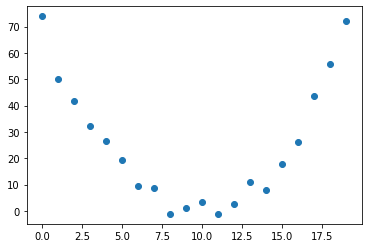

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time - 9.5)**2 + 1
plt.scatter(time, speed) 

In [ ]:
# step 1 - initialize the parameters

def f(t, params) :
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [ ]:
def mse(preds, targets):
  return ((targets - preds)**2).mean()

params = torch.randn(3).requires_grad_()

# step 2 - calculate the predictions 

preds = f(time, params)

In [ ]:
def show_preds(preds, ax = None):
  if ax is None : ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color = 'red')
  ax.set_ylim(-300, 100)

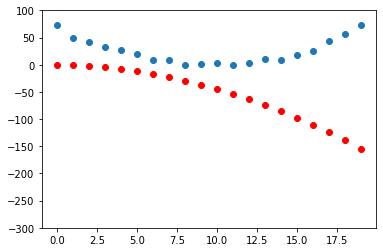

In [ ]:
show_preds(preds)

In [ ]:
preds

tensor([ 1.3788e-01, -7.5787e-01, -2.4575e+00, -4.9611e+00, -8.2687e+00,
        -1.2380e+01, -1.7296e+01, -2.3015e+01, -2.9538e+01, -3.6865e+01,
        -4.4996e+01, -5.3931e+01, -6.3670e+01, -7.4213e+01, -8.5560e+01,
        -9.7711e+01, -1.1067e+02, -1.2442e+02, -1.3899e+02, -1.5435e+02],
       grad_fn=<AddBackward0>)

In [ ]:
speed

tensor([73.8966, 50.0226, 41.6139, 32.3244, 26.5059, 19.1708,  9.4064,  8.7978,
        -1.1562,  0.9961,  3.4974, -1.1075,  2.5895, 11.0566,  7.8391, 17.7379,
        26.0364, 43.4996, 55.6911, 72.2550])

In [ ]:
loss = mse(preds, speed)

print (loss)

tensor(9625.5723, grad_fn=<MeanBackward0>)


In [ ]:
# step3 - calculate the gradients

loss.backward()

In [ ]:
params

tensor([-0.4020, -0.4938,  0.1379], requires_grad=True)

In [ ]:
params.grad

tensor([-31719.2793,  -2035.8950,   -158.4585])

In [ ]:
params.grad * 1e-5

tensor([-0.3172, -0.0204, -0.0016])

In [ ]:
params.grad.data

tensor([-31719.2793,  -2035.8950,   -158.4585])

In [ ]:
# step 4 - step the weights

lr = 1e-5
params.data -= params.grad.data * lr
params.grad = None

In [ ]:

preds = f(time, params)
loss = mse(preds, speed)

In [ ]:
print (loss)

tensor(2376.7627, grad_fn=<MeanBackward0>)


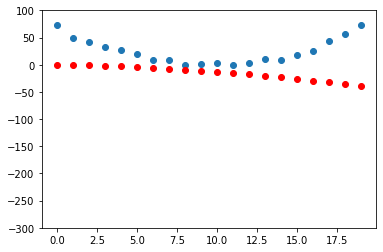

In [ ]:
show_preds(preds)

In [ ]:
def apply_step(params, prn = True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= params.grad.data * lr
  params.grad = None
  if prn :
    print (loss.item())
  
  return preds

In [ ]:
for i in range(10):
  apply_step(params)

2376.7626953125
1005.0631713867188
745.4927978515625
696.3712158203125
687.0729370117188
685.3104248046875
684.9739990234375
684.9073486328125
684.8917846679688
684.8859252929688


In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])

valid_7_tens = valid_7_tens.float()/ 255

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(-1)

print (train_x.shape, train_y.shape)

torch.Size([12396, 784]) torch.Size([12396, 1])


In [ ]:
dset = list(zip(train_x, train_y))

x, y = dset[0]

print (x.shape, y)

torch.Size([784]) tensor([1])


In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

valid_dset = list(zip(valid_x, valid_y))

In [ ]:
def init_params(size, std = 1.0):
  return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28*1)) 

In [ ]:
weights.shape

torch.Size([784])

In [ ]:
bias = init_params(1)

print (bias)

tensor([1.4954], requires_grad=True)


In [ ]:
def linear1(xb):
  return xb@weights + bias

In [ ]:
preds = linear1(train_x)

In [ ]:
corrects = (preds > 0.0).float() == train_y

In [ ]:
corrects.float().mean().item()

0.5004822015762329

In [ ]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

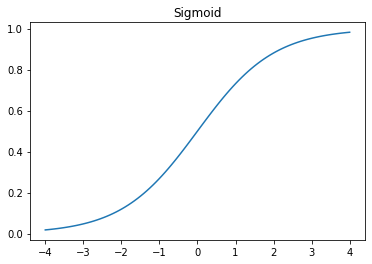

In [ ]:
plot_function(torch.sigmoid , title = "Sigmoid", min = -4, max = 4)

In [ ]:
weights = init_params((28*28*1))
bias = init_params(1)

dl = DataLoader(dset, batch_size = 256)
xb, yb = first(dl)

In [ ]:
print (xb.shape, yb.shape)

torch.Size([256, 784]) torch.Size([256, 1])


In [ ]:
preds = linear1(xb)

In [ ]:
loss = mnist_loss(yb, preds)

In [ ]:
print (loss)

tensor(0.8725, grad_fn=<MeanBackward0>)


In [ ]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784]), tensor(-0.0038), tensor([-0.0273]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
simple_net = nn.Sequential(nn.Linear(28*28, 30), 
                           nn.ReLU(),
                           nn.Linear(30, 1))

In [ ]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb 
  return correct.float().mean()

In [ ]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 +b2
  return res

In [ ]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)

In [ ]:
learn = Learner(dls, simple_net, loss_func = mnist_loss, opt_func=SGD, metrics = batch_accuracy)

learn.fit(40, 0.01)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.025648,0.031392,0.975957,00:00
1,0.025552,0.031277,0.975957,00:00
2,0.025443,0.031163,0.975957,00:00
3,0.025327,0.031052,0.975957,00:00
4,0.025208,0.030942,0.975957,00:00
5,0.025088,0.030834,0.975957,00:00
6,0.024969,0.030729,0.975957,00:00
7,0.024852,0.030625,0.975957,00:00
8,0.024736,0.030522,0.975957,00:00
9,0.024623,0.030421,0.975957,00:00


In [ ]:
simple_net

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [4]:
path = untar_data(URLs.FLOWERS)

In [ ]:
path.ls()

(#4) [Path('/root/.fastai/data/oxford-102-flowers/valid.txt'),Path('/root/.fastai/data/oxford-102-flowers/test.txt'),Path('/root/.fastai/data/oxford-102-flowers/jpg'),Path('/root/.fastai/data/oxford-102-flowers/train.txt')]

In [ ]:
(path/"jpg").ls()

(#8189) [Path('/root/.fastai/data/oxford-102-flowers/jpg/image_01510.jpg'),Path('/root/.fastai/data/oxford-102-flowers/jpg/image_07914.jpg'),Path('/root/.fastai/data/oxford-102-flowers/jpg/image_04279.jpg'),Path('/root/.fastai/data/oxford-102-flowers/jpg/image_04472.jpg'),Path('/root/.fastai/data/oxford-102-flowers/jpg/image_02371.jpg'),Path('/root/.fastai/data/oxford-102-flowers/jpg/image_04813.jpg'),Path('/root/.fastai/data/oxford-102-flowers/jpg/image_00687.jpg'),Path('/root/.fastai/data/oxford-102-flowers/jpg/image_06005.jpg'),Path('/root/.fastai/data/oxford-102-flowers/jpg/image_05304.jpg'),Path('/root/.fastai/data/oxford-102-flowers/jpg/image_00584.jpg')...]

In [ ]:
(path/"test.txt")

Path('/root/.fastai/data/oxford-102-flowers/test.txt')

In [5]:
dir = '/root/.fastai/data/oxford-102-flowers/train.txt'

In [6]:
f = open(dir, "r")

In [7]:
df = pd.DataFrame()
paths = []
labels = []
for i in f.readlines() :
  j = i.split(" ")
  paths.append(j[0])
  labels.append(j[1])

print (len(paths), len(labels))

1020 1020


In [8]:
df["fname"] = paths
df["labels"] = labels
df["is_valid"] = False

In [ ]:
df.head()

,fname,labels,is_valid
0,jpg/image_03860.jpg,16\n,False
1,jpg/image_06092.jpg,13\n,False
2,jpg/image_02400.jpg,42\n,False
3,jpg/image_02852.jpg,55\n,False
4,jpg/image_07710.jpg,96\n,False


In [9]:
import re

In [10]:
df["labels"] = df["labels"].apply(lambda x: re.sub("\n", "", x))

In [ ]:
df.head()

,fname,labels,is_valid
0,jpg/image_03860.jpg,16,False
1,jpg/image_06092.jpg,13,False
2,jpg/image_02400.jpg,42,False
3,jpg/image_02852.jpg,55,False
4,jpg/image_07710.jpg,96,False


In [11]:
dir = '/root/.fastai/data/oxford-102-flowers/valid.txt'

In [12]:
f = open(dir, "r")

In [13]:
df_valid = pd.DataFrame()
paths = []
labels = []
for i in f.readlines() :
  j = i.split(" ")
  paths.append(j[0])
  labels.append(j[1])

print (len(paths), len(labels))

1020 1020


In [14]:
df_valid["fname"] = paths
df_valid["labels"] = labels
df_valid["is_valid"] = True



In [15]:
df_valid["labels"] = df_valid["labels"].apply(lambda x: re.sub("\n", "", x))

In [ ]:
df_valid.head()

,fname,labels,is_valid
0,jpg/image_04467.jpg,89,True
1,jpg/image_07129.jpg,44,True
2,jpg/image_05166.jpg,4,True
3,jpg/image_07002.jpg,34,True
4,jpg/image_02007.jpg,79,True


In [16]:
df = pd.concat([df, df_valid], axis = 0)

In [ ]:
df.head()

,fname,labels,is_valid
0,jpg/image_03860.jpg,16,False
1,jpg/image_06092.jpg,13,False
2,jpg/image_02400.jpg,42,False
3,jpg/image_02852.jpg,55,False
4,jpg/image_07710.jpg,96,False


In [ ]:
df.shape

(2040, 3)

In [17]:
import os

In [18]:
os.getcwd()

'/content'

In [19]:
os.chdir('/root/.fastai/data/oxford-102-flowers/')

In [ ]:
path

Path('/root/.fastai/data/oxford-102-flowers')

In [20]:
df["labels"] = df["labels"].astype(int)

In [ ]:
df["is_valid"].value_counts()

True     1020
False    1020
Name: is_valid, dtype: int64

In [21]:
df["is_valid"].dtype

dtype('bool')

In [ ]:
dls = ImageDataLoaders.from_df(df, item_tfms=Resize(460), batch_tfms = aug_transforms(size = 224, min_scale=0.75), device = "cuda")

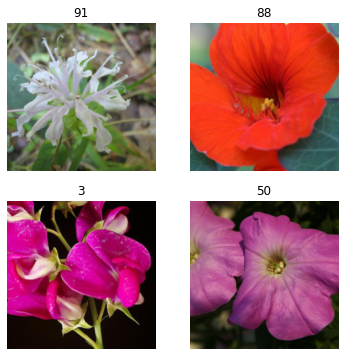

In [ ]:
dls.show_batch(max_n = 4)

In [22]:
oxford = DataBlock(blocks = (ImageBlock, CategoryBlock), 
                 splitter = ColSplitter(),
                 get_x = ColReader(0), 
                 get_y = ColReader(1), 
                 item_tfms = Resize(460), 
                 batch_tfms = aug_transforms(size = 224, min_scale = 0.75))

In [24]:
dls1 = oxford.dataloaders(df, device = "cuda")

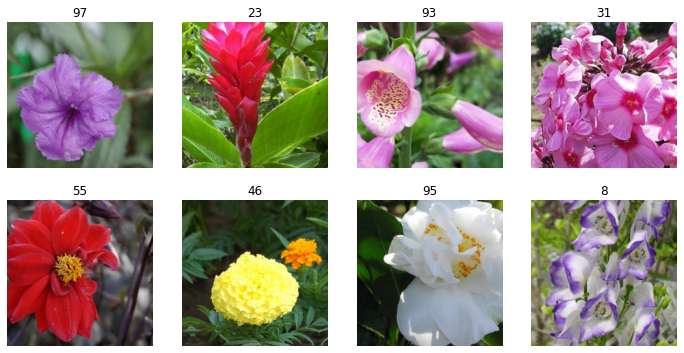

In [26]:
dls1.show_batch(max_n = 8)

In [27]:
learn = cnn_learner(dls1, resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [28]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,5.962216,3.518923,0.785294,00:31


epoch,train_loss,valid_loss,error_rate,time
0,3.912278,2.176008,0.491176,00:31
1,2.973475,1.729859,0.383333,00:31


In [29]:
interp = ClassificationInterpretation.from_learner(learn)

interp.most_confused(min_val = 3)

[(11, 49, 5),
 (35, 80, 5),
 (27, 24, 3),
 (30, 21, 3),
 (33, 65, 3),
 (37, 21, 3),
 (52, 45, 3),
 (53, 40, 3),
 (66, 68, 3),
 (77, 68, 3),
 (82, 85, 3),
 (96, 22, 3)]

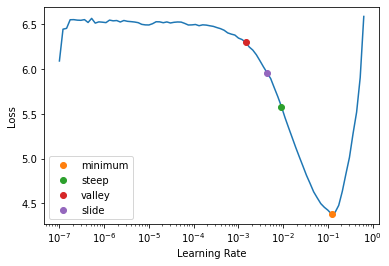

In [30]:
learn = cnn_learner(dls1, resnet34, metrics = error_rate)

lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [31]:
lrs.minimum

0.012022644281387329

In [33]:
learn = cnn_learner(dls1, resnet34, metrics = error_rate)

learn.fine_tune(3, base_lr = lrs.minimum / 10)

epoch,train_loss,valid_loss,error_rate,time
0,6.245136,4.308996,0.927451,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.914281,3.319349,0.755882,00:30
1,3.984755,2.307491,0.516667,00:31
2,3.344774,2.131010,0.471569,00:31


In [34]:
learn = cnn_learner(dls1, resnet34, metrics = error_rate)

learn.fit_one_cycle(3, lr_max=lrs.minimum / 10)

epoch,train_loss,valid_loss,error_rate,time
0,6.016883,3.912796,0.853922,00:30
1,4.738824,2.410753,0.541176,00:30
2,3.838539,2.196284,0.485294,00:29


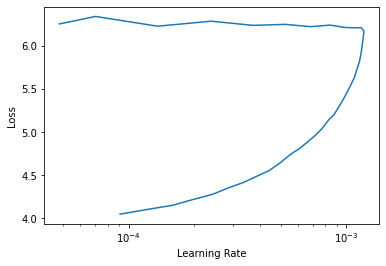

In [35]:
learn.recorder.plot_lr_find()

In [36]:
## unfreeze the model

SuggestedLRs(valley=0.0014454397605732083)

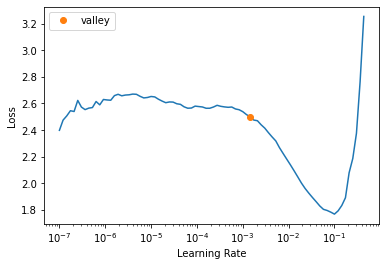

In [37]:
learn.lr_find()

In [38]:
learn.fit_one_cycle(10, lr_max = 1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,2.641246,2.200842,0.482353,00:30
1,2.605177,2.197542,0.481373,00:29
2,2.580084,2.180992,0.482353,00:29
3,2.572224,2.176935,0.471569,00:29
4,2.584624,2.169044,0.476471,00:29
5,2.561787,2.155491,0.468627,00:30
6,2.540918,2.150225,0.463725,00:30
7,2.535115,2.143256,0.468627,00:30
8,2.527945,2.145392,0.466667,00:30
9,2.516028,2.151449,0.468627,00:30


In [39]:
## using discriminative learning rate

In [40]:
learn = cnn_learner(dls1, resnet34, metrics = error_rate)
learn.fit_one_cycle(3, lrs.minimum / 10)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,6.005177,3.963338,0.868627,00:30
1,4.755446,2.412061,0.539216,00:30
2,3.863960,2.169082,0.482353,00:30


epoch,train_loss,valid_loss,error_rate,time
0,2.602894,2.166925,0.487255,00:31
1,2.535414,2.088619,0.471569,00:31
2,2.451341,1.936968,0.434314,00:31
3,2.387423,1.801673,0.398039,00:31
4,2.241551,1.686312,0.356863,00:31
5,2.124259,1.587626,0.339216,00:31
6,1.992530,1.520398,0.323529,00:31
7,1.890987,1.471564,0.300000,00:31
8,1.810572,1.442187,0.295098,00:31
9,1.736127,1.419288,0.293137,00:31


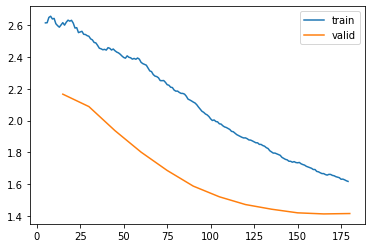

In [41]:
learn.recorder.plot_loss()

In [42]:
# increase the training speed using fp16

In [43]:
from fastai.callback.fp16 import *

In [44]:
learn = cnn_learner(dls1, resnet50, metrics = error_rate).to_fp16()

learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,5.999168,3.811270,0.819608,00:41
1,4.230799,1.319423,0.316667,00:35
2,2.824659,0.786449,0.205882,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.484346,0.670209,0.164706,00:42
1,0.397518,0.541684,0.140196,00:40
2,0.324315,0.517754,0.126471,00:40
3,0.252193,0.444083,0.116667,00:40
4,0.200785,0.417458,0.103922,00:40
5,0.161203,0.414260,0.103922,00:40


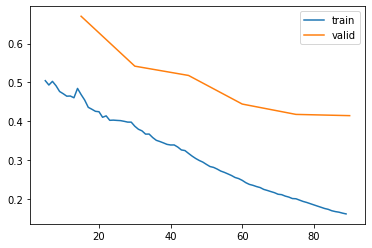

In [45]:
learn.recorder.plot_loss()